## THE BASICS - Importing, train/test split

In [1]:
import numpy as np
import pandas as pd

In [2]:
main_df = pd.read_csv('data/df', index_col=0)

In [3]:
main_df

,tweet,product,emotion,brand,emotion_label,length,exclamation,hashtag,mention,sentiment,clean_tweet,tokens,tokens_no_brands,tokens_sparse
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,0,127,True,"['#RISE_Austin', '#SXSW']",['wesley83'],True,mention i have a 3g iphone after 3 hrs twee...,"['mention', '3g', 'iphone', '3', 'hrs', 'tweet...","['mention', '3g', '3', 'hrs', 'tweeting', 'ris...","['3g', 'hrs', 'tweeting', 'rise_austin', 'dead..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,2,139,False,['#SXSW'],"['jessedee', 'fludapp']",True,mention know about mention awesome ipad ip...,"['mention', 'know', 'mention', 'awesome', 'ipa...","['mention', 'know', 'mention', 'awesome', 'app...","['know', 'awesome', 'likely', 'appreciate', 'd..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,2,79,False,"['#iPad', '#SXSW']",['swonderlin'],True,mention can not wait for ipad 2 also they s...,"['mention', 'wait', 'ipad', '2', 'also', 'sale...","['mention', 'wait', '2', 'also', 'sale', 'sxsw']","['wait', 'also', 'sale']"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,0,82,False,['#sxsw'],['sxsw'],True,mention i hope this year s festival isn t as ...,"['mention', 'hope', 'year', 'festival', 'crash...","['mention', 'hope', 'year', 'festival', 'crash...","['hope', 'year', 'festival', 'crashy', 'year']"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,2,131,False,['#SXSW'],['sxtxstate'],True,mention great stuff on fri sxsw marissa may...,"['mention', 'great', 'stuff', 'fri', 'sxsw', '...","['mention', 'great', 'stuff', 'fri', 'sxsw', '...","['great', 'stuff', 'fri', 'marissa', 'mayer', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Apple,2,29,False,['#SXSW'],[],True,ipad everywhere sxsw link,"['ipad', 'everywhere', 'sxsw', 'link']","['everywhere', 'sxsw', 'link']",['everywhere']
9089,"Wave, buzz... RT @mention We interrupt your re...",None,None,NaN,1,125,False,"['#sxsw', '#google', '#circles']",['mention'],False,wave buzz rt mention we interrupt your re...,"['wave', 'buzz', 'rt', 'mention', 'interrupt',...","['wave', 'buzz', 'rt', 'mention', 'interrupt',...","['wave', 'buzz', 'interrupt', 'regularly', 'sc..."
9090,"Google's Zeiger, a physician never reported po...",None,None,NaN,1,145,False,"['#sxsw', '#health2dev']",[],False,google s zeiger a physician never reported po...,"['google', 'zeiger', 'physician', 'never', 're...","['zeiger', 'physician', 'never', 'reported', '...","['zeiger', 'physician', 'never', 'reported', '..."
9091,Some Verizon iPhone customers complained their...,None,None,NaN,1,140,False,['#SXSW'],[],False,some verizon iphone customers complained their...,"['verizon', 'iphone', 'customers', 'complained...","['verizon', 'customers', 'complained', 'time',...","['verizon', 'customers', 'complained', 'time',..."


In [4]:
# convert lists back into form from strings after import (because import treats list as strings)


import ast
main_df['tokens'] =[ast.literal_eval(x) for x in main_df['tokens'] ]
main_df['tokens_sparse'] =[ast.literal_eval(x) for x in main_df['tokens_sparse'] ]
main_df['tokens_no_brands'] =[ast.literal_eval(x) for x in main_df['tokens_no_brands'] ]

In [5]:
main_df['sparse_joined'] = main_df['tokens_sparse'].apply(lambda x: " ".join(x))
main_df['tokens_joined'] = main_df['tokens'].apply(lambda x: " ".join(x))
main_df['no_brand_joined'] = main_df['tokens_no_brands'].apply(lambda x: " ".join(x))

In [6]:
type(main_df['tokens'].iloc[0])

list

In [7]:
main_df


,tweet,product,emotion,brand,emotion_label,length,exclamation,hashtag,mention,sentiment,clean_tweet,tokens,tokens_no_brands,tokens_sparse,sparse_joined,tokens_joined,no_brand_joined
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,0,127,True,"['#RISE_Austin', '#SXSW']",['wesley83'],True,mention i have a 3g iphone after 3 hrs twee...,"[mention, 3g, iphone, 3, hrs, tweeting, rise_a...","[mention, 3g, 3, hrs, tweeting, rise_austin, d...","[3g, hrs, tweeting, rise_austin, dead, need, u...",3g hrs tweeting rise_austin dead need upgrade ...,mention 3g iphone 3 hrs tweeting rise_austin d...,mention 3g 3 hrs tweeting rise_austin dead nee...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,2,139,False,['#SXSW'],"['jessedee', 'fludapp']",True,mention know about mention awesome ipad ip...,"[mention, know, mention, awesome, ipad, iphone...","[mention, know, mention, awesome, app, likely,...","[know, awesome, likely, appreciate, design, al...",know awesome likely appreciate design also giv...,mention know mention awesome ipad iphone app l...,mention know mention awesome app likely apprec...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,2,79,False,"['#iPad', '#SXSW']",['swonderlin'],True,mention can not wait for ipad 2 also they s...,"[mention, wait, ipad, 2, also, sale, sxsw]","[mention, wait, 2, also, sale, sxsw]","[wait, also, sale]",wait also sale,mention wait ipad 2 also sale sxsw,mention wait 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,0,82,False,['#sxsw'],['sxsw'],True,mention i hope this year s festival isn t as ...,"[mention, hope, year, festival, crashy, year, ...","[mention, hope, year, festival, crashy, year, ...","[hope, year, festival, crashy, year]",hope year festival crashy year,mention hope year festival crashy year iphone ...,mention hope year festival crashy year app men...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,2,131,False,['#SXSW'],['sxtxstate'],True,mention great stuff on fri sxsw marissa may...,"[mention, great, stuff, fri, sxsw, marissa, ma...","[mention, great, stuff, fri, sxsw, marissa, ma...","[great, stuff, fri, marissa, mayer, tim, reill...",great stuff fri marissa mayer tim reilly tech ...,mention great stuff fri sxsw marissa mayer goo...,mention great stuff fri sxsw marissa mayer tim...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive,Apple,2,29,False,['#SXSW'],[],True,ipad everywhere sxsw link,"[ipad, everywhere, sxsw, link]","[everywhere, sxsw, link]",[everywhere],everywhere,ipad everywhere sxsw link,everywhere sxsw link
9089,"Wave, buzz... RT @mention We interrupt your re...",None,None,NaN,1,125,False,"['#sxsw', '#google', '#circles']",['mention'],False,wave buzz rt mention we interrupt your re...,"[wave, buzz, rt, mention, interrupt, regularly...","[wave, buzz, rt, mention, interrupt, regularly...","[wave, buzz, interrupt, regularly, scheduled, ...",wave buzz interrupt regularly scheduled geek p...,wave buzz rt mention interrupt regularly sched...,wave buzz rt mention interrupt regularly sched...
9090,"Google's Zeiger, a physician never reported po...",None,None,NaN,1,145,False,"['#sxsw', '#health2dev']",[],False,google s zeiger a physician never reported po...,"[google, zeiger, physician, never, reported, p...","[zeiger, physician, never, reported, potential...","[zeiger, physician, never, reported, potential...",zeiger physician never reported potential ae y...,google zeiger physician never reported potenti...,zeiger physician never reported potential ae y...
9091,Some Verizon iPhone customers complained their...,None,None,NaN,1,140,False,['#SXSW'],[],False,some verizon iphone customers complained their...,"[verizon, iphone, customers, complained, time,...","[verizon, customers, complained, time, fell, b...","[verizon, customers, complained, time, fell, 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X= main_df.drop(columns=['emotion', 'emotion_label'], axis=1)
y= main_df['emotion_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state = 42, stratify = y)


In [10]:
y_test.shape, X_test.shape

((2673,), (2673, 15))

In [11]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size =.3, random_state = 42, stratify = y_test)


In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((6236, 15), (1871, 15), (6236,), (1871,), (802, 15), (802,))

In [13]:
df_pos = main_df.loc[(main_df['emotion']=='None')|(main_df['emotion']=='Positive')]
X= df_pos.drop(columns=['emotion', 'emotion_label'])
y= df_pos['emotion_label']

In [14]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,random_state=42, test_size= 0.3, stratify=y)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test2, y_test2, test_size=.3, stratify= y_test2)

# SIA

The idea here is that I'm going to take all four SIA scores for each tweet and then run the models on that data alone, leaving out the word vectorization entirely.

In [15]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
sia = SentimentIntensityAnalyzer()

In [18]:
for tweet in X_train['sparse_joined']:
    
    print(sia.polarity_scores(tweet))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'compound': -0.5574}
{'neg': 0.107, 'neu': 0.565, 'pos': 0.328, 'compound': 0.5994}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.7845}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6597}
{'neg': 0.56, 'neu': 0.44, 'pos': 0.0, 'compound': -0.872}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.796

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.296, 'pos': 0.704, 'compound': 0.9231}
{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.4939}
{'neg': 0.416, 'neu': 0.584, 'pos': 0.0, 'compound': -0.7506}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.0772}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.361,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.0772}
{'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'comp

{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}
{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.1531}
{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.7906}
{'neg': 0.416, 'neu': 0.584, 'pos': 0.0, 'compound': -0.7506}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.208, 'neu': 0.417, 'pos': 0.375, 'compound': 0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.265, 'neu': 0.735, 'pos': 0.0, 'compound': -0.2023}
{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.2516}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6808}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'n

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.6705}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.0258}
{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.2263}
{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}
{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.9153}
{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.765}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.188, 'neu': 0.376, 'pos': 0.436, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.3182}
{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.401

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.5994}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.5106}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.191, 'neu': 0.617, 'pos': 0.191, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}
{'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
{'neg': 0.0,

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.0772}
{'neg': 0.365, 'neu': 0.435, 'pos': 0.2, 'compound': -0.2263}
{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}
{'neg': 0.226, 'neu': 0.549, 'pos': 0.226, 'compound': 0.25}
{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.5267}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.8439}
{'neg': 0.286, 'neu': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.7579}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2263}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.4588}
{'neg': 0.066, 'neu': 0.663, 'pos': 0.27, 'compound': 0.6124}
{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.4767}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.122, 'neu': 0.406, 'po

In [24]:

X_train['neg'] = X_train['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['neg'])
X_train['neu'] = X_train['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['neu'])
X_train['pos'] = X_train['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['pos'])
X_train['compound'] = X_train['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [25]:
X_train

,tweet,product,brand,length,exclamation,hashtag,mention,sentiment,clean_tweet,tokens,tokens_no_brands,tokens_sparse,sparse_joined,tokens_joined,no_brand_joined,neg,neu,pos,compound
8049,Google's social network rumored to launch soon...,None,NaN,81,False,"['#GoogleCircles', '#gsdm', '#sxsw']",[],False,google s social network rumored to launch soon...,"[google, social, network, rumored, launch, soo...","[social, network, rumored, launch, soon, googl...","[network, rumored, soon, googlecircles, gsdm]",network rumored soon googlecircles gsdm,google social network rumored launch soon goog...,social network rumored launch soon googlecircl...,0.000,1.000,0.000,0.0000
505,Google is focusing on bridging the digital/phy...,Google,Google,129,False,['#sxsw'],['mention'],True,google is focusing on bridging the digital phy...,"[google, focusing, bridging, digital, physical...","[focusing, bridging, digital, physical, divide...","[focusing, bridging, digital, physical, divide...",focusing bridging digital physical divide eg m...,google focusing bridging digital physical divi...,focusing bridging digital physical divide eg m...,0.000,1.000,0.000,0.0000
9044,Look everyone! Zomg @mention got an iPad 2 on ...,iPad,Apple,73,True,['#sxsw'],['mention'],True,look everyone zomg mention got an ipad 2 on ...,"[look, everyone, zomg, mention, got, ipad, 2, ...","[look, everyone, zomg, mention, got, 2, first,...","[look, everyone, zomg, got, first, day]",look everyone zomg got first day,look everyone zomg mention got ipad 2 first da...,look everyone zomg mention got 2 first day sxs...,0.000,1.000,0.000,0.0000
5428,"RT @mention Apple is &quot;the classiest, fasc...",Apple,Apple,95,False,['#sxsw'],"['mention', 'mention']",True,rt mention apple is quot the classiest fasc...,"[rt, mention, apple, quot, classiest, fascist,...","[rt, mention, quot, classiest, fascist, compan...","[classiest, fascist, company, america, says]",classiest fascist company america says,rt mention apple quot classiest fascist compan...,rt mention quot classiest fascist company amer...,0.474,0.526,0.000,-0.5574
6918,RT @mention Well. Forget the #NFL #lockout rig...,iPad,Apple,151,False,"['#NFL', '#lockout', '#SXSW']",['mention'],True,rt mention well forget the nfl lockout rig...,"[rt, mention, well, forget, nfl, lockout, righ...","[rt, mention, well, forget, nfl, lockout, righ...","[well, forget, nfl, lockout, right, gonna, foc...",well forget nfl lockout right gonna focus gett...,rt mention well forget nfl lockout right gonna...,rt mention well forget nfl lockout right gonna...,0.107,0.565,0.328,0.5994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,Are you at #sxsw? Check out #Tokii in the the ...,None,NaN,92,False,"['#sxsw', '#Tokii']",[],False,are you at sxsw check out tokii in the the ...,"[sxsw, check, tokii, maple, leaf, digital, lou...","[sxsw, check, tokii, maple, leaf, digital, lou...","[check, tokii, maple, leaf, digital, lounge, w...",check tokii maple leaf digital lounge www toki...,sxsw check tokii maple leaf digital lounge lin...,sxsw check tokii maple leaf digital lounge lin...,0.000,1.000,0.000,0.0000
7988,At #SXSW seeing a demo of #Google maps for mob...,Other Google product or service,Google,89,False,"['#SXSW', '#Google']",[],True,at sxsw seeing a demo of google maps for mob...,"[sxsw, seeing, demo, google, maps, mobile, 5, ...","[sxsw, seeing, demo, maps, mobile, 5, 2, 3d, r...","[seeing, demo, maps, mobile, 3d, rotational, v...",seeing demo maps mobile 3d rotational viewing ...,sxsw seeing demo google maps mobile 5 2 3d rot...,sxsw seeing demo maps mobile 5 2 3d rotational...,0.000,0.753,0.247,0.3182
6776,"RT @mention There is an art to advertising, no...",None,NaN,142,False,"['#SXSW', '#sxflip', '#SXSWi']","['mention', 'mention']",False,rt mention there is an art to advertising no...,"[rt, mention, art, advertising, statistics, sa...","[rt, mention, art, advertising, statistics, sa...","[art, advertising, statistics, says, admo

In [27]:
X_train_sia = X_train[['neg','neu','pos','compound']]
X_train_sia

,neg,neu,pos,compound
8049,0.000,1.000,0.000,0.0000
505,0.000,1.000,0.000,0.0000
9044,0.000,1.000,0.000,0.0000
5428,0.474,0.526,0.000,-0.5574
6918,0.107,0.565,0.328,0.5994
...,...,...,...,...
8201,0.000,1.000,0.000,0.0000
7988,0.000,0.753,0.247,0.3182
6776,0.000,1.000,0.000,0.0000
2382,0.000,1.000,0.000,0.0000


In [87]:
X_test['neg'] = X_test['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['neg'])
X_test['neu'] = X_test['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['neu'])
X_test['pos'] = X_test['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['pos'])
X_test['compound'] = X_test['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['compound'])

X_test_sia = X_test[['neg','neu','pos','compound']]
X_test_sia

,neg,neu,pos,compound
8641,0.000,0.496,0.504,0.7269
3620,0.000,1.000,0.000,0.0000
477,0.000,0.519,0.481,0.5719
565,0.000,1.000,0.000,0.0000
8787,0.000,1.000,0.000,0.0000
...,...,...,...,...
4824,0.268,0.732,0.000,-0.2960
8788,0.259,0.741,0.000,-0.1027
6066,0.000,0.583,0.417,0.6124
385,0.000,0.649,0.351,0.4019


In [100]:
def add_sia_to_df(df, column):
    df['neg'] = df[column].apply(lambda x: sia.polarity_scores(x)['neg'])
    df['neu'] = df[column].apply(lambda x: sia.polarity_scores(x)['neu'])
    df['pos'] = df[column].apply(lambda x: sia.polarity_scores(x)['pos'])
    df['compound'] = df[column].apply(lambda x: sia.polarity_scores(x)['compound'])

    df_sia = df[['neg','neu','pos','compound']]
    return df_sia

In [101]:
X_test2_sia = add_sia_to_df(X_test2, 'sparse_joined')

In [102]:
X_test2_sia

,neg,neu,pos,compound
362,0.0,0.305,0.695,0.9287
1239,0.0,1.000,0.000,0.0000
7468,0.0,1.000,0.000,0.0000
7788,0.0,0.800,0.200,0.3612
2816,0.0,1.000,0.000,0.0000
...,...,...,...,...
5786,0.1,0.429,0.471,0.7351
7047,0.0,1.000,0.000,0.0000
1712,0.0,0.631,0.369,0.6249
5819,0.0,0.776,0.224,0.3818


# Vectorization



In [15]:
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [42]:
# tfidf = TfidfVectorizer()
# X_train_vectorized = tfidf.fit_transform(X_train['tokens_joined'])
# X_test_vectorized = tfidf.transform(X_test['tokens_joined'])
# #most common words
# X_train_tfidf = pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=tfidf.get_feature_names())
# X_test_tfidf = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized, columns=tfidf.get_feature_names())



In [39]:
# type(X_train_vectorized)

scipy.sparse.csr.csr_matrix

In [40]:
# type(X_train2_tfidf_sparse)

pandas.core.frame.DataFrame

In [ ]:
# tfidf2 = TfidfVectorizer()
# X_train2_vectorized = tfidf2.fit_transform(X_train2['sparse_joined'])
# X_test2_vectorized = tfidf2.transform(X_test2['sparse_joined'])
# X_train2_tfidf_sparse = pd.DataFrame.sparse.from_spmatrix(X_train2_vectorized, columns=tfidf2.get_feature_names())
# X_test2_tfidf_sparse = pd.DataFrame.sparse.from_spmatrix(X_test2_vectorized, columns=tfidf2.get_feature_names())

In [45]:
# count_vec = CountVectorizer()
# X_train_vectorized2 = count_vec.fit_transform(X_train['tokens_joined'])
# X_test_vectorized2 = count_vec.transform(X_test['tokens_joined'])

# X_train_cv_sparse =  pd.DataFrame.sparse.from_spmatrix(X_train_vectorized2, columns=count_vec.get_feature_names())
# X_test_cv_sparse = pd.DataFrame.sparse.from_spmatrix(X_test_vectorized2, columns=count_vec.get_feature_names())

In [ ]:
# count_vec2 = CountVectorizer()
# X_train2_vectorized2 = count_vec.fit_transform(X_train2['sparse_joined'])
# X_test2_vectorized2 = count_vec.transform(X_train2['sparse_joined'])

# X_train2_cv_sparse =  pd.DataFrame.sparse.from_spmatrix(X_train2_vectorized2, columns=count_vec2.get_feature_names())
# X_test2_cv_sparse = pd.DataFrame.sparse.from_spmatrix(X_test2_vectorized2, columns=count_vec2.get_feature_names())

# Baseline  
1 = none  
2 = positive  
0 = negative

In [28]:
y_train.value_counts(normalize=True)

1    0.602951
2    0.333226
0    0.063823
Name: emotion_label, dtype: float64

In [29]:
y_train

8049    1
505     2
9044    2
5428    0
6918    2
       ..
8201    1
7988    2
6776    1
2382    1
8219    1
Name: emotion_label, Length: 6236, dtype: int64

# Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [31]:
desc_tree = DecisionTreeClassifier()
desc_tree.fit(X_train_sia, y_train)


DecisionTreeClassifier()

In [32]:
sia_cv = cross_val_score(desc_tree, X_train_sia, y_train).mean()

In [33]:
sia_cv

0.6112881171221188

In [34]:
desc_tree = DecisionTreeClassifier(criterion='entropy')
desc_tree.fit(X_train_sia, y_train)

sia_cv = cross_val_score(desc_tree, X_train_sia, y_train).mean()
sia_cv

0.6152969691361833

In [38]:
desc_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
desc_tree.fit(X_train_sia, y_train)

sia_cv = cross_val_score(desc_tree, X_train_sia, y_train).mean()
sia_cv

0.6234767287644193

In [41]:
desc_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 3, splitter ='random')
desc_tree.fit(X_train_sia, y_train)

sia_cv = cross_val_score(desc_tree, X_train_sia, y_train).mean()
sia_cv

0.6127324810313984

In [63]:
desc_tree = DecisionTreeClassifier(max_depth = 3, max_features=2)
desc_tree.fit(X_train_sia, y_train)

sia_cv = cross_val_score(desc_tree, X_train_sia, y_train).mean()
sia_cv

0.620750956140892

In [64]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_sia, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
sia_cv = cross_val_score(neigh, X_train_sia, y_train).mean()
sia_cv

0.5899589784714083

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
ranfor = RandomForestClassifier(n_estimators=10)
ranfor.fit(X_train_sia,y_train)

RandomForestClassifier(n_estimators=10)

In [70]:
sia_cv = cross_val_score(ranfor, X_train_sia, y_train).mean()
sia_cv

0.6125726101618243

# Model on binary

In [72]:
sia2 = SentimentIntensityAnalyzer()

X_train2['neg'] = X_train2['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['neg'])
X_train2['neu'] = X_train2['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['neu'])
X_train2['pos'] = X_train2['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['pos'])
X_train2['compound'] = X_train2['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['compound'])

X_train2_sia = X_train2[['neg','neu','pos','compound']]
X_train2_sia


<ipython-input-72-341fb3331c6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train2['neg'] = X_train2['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['neg'])
<ipython-input-72-341fb3331c6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train2['neu'] = X_train2['sparse_joined'].apply(lambda x: sia.polarity_scores(x)['neu'])
<ipython-input-72-341fb3331c6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,neg,neu,pos,compound
2823,0.000,1.000,0.000,0.0000
262,0.000,1.000,0.000,0.0000
2815,0.416,0.584,0.000,-0.7506
2295,0.140,0.581,0.279,0.3400
4701,0.225,0.596,0.179,-0.1779
...,...,...,...,...
7514,0.565,0.435,0.000,-0.5994
5422,0.000,0.408,0.592,0.7003
3124,0.000,1.000,0.000,0.0000
2142,0.000,1.000,0.000,0.0000


In [74]:
desc_tree = DecisionTreeClassifier()
desc_tree.fit(X_train2_sia, y_train2)
sia_cv = cross_val_score(desc_tree, X_train2_sia, y_train2).mean()
sia_cv

0.6625541430432793

In [81]:
desc_tree = DecisionTreeClassifier(max_depth =3)
desc_tree.fit(X_train2_sia, y_train2)

sia_cv = cross_val_score(desc_tree, X_train2_sia, y_train2).mean()
sia_cv

0.6637524797220363

In [83]:
ranfor = RandomForestClassifier()
ranfor.fit(X_train2_sia,y_train2)
sia_cv = cross_val_score(ranfor, X_train2_sia, y_train2).mean()
sia_cv

0.6627240553579602

# Final  experiment  

What happens if only the SIA scores for each tweet are fed to models? 

In [94]:
from sklearn.naive_bayes import (
    BernoulliNB,
    ComplementNB,
    MultinomialNB,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [97]:
classifiers = {
    "BernoulliNB": BernoulliNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
}

Train score: 56.86% - BernoulliNB
Test score: 59.06% - BernoulliNB
Train score: 68.46% - KNeighborsClassifier
Test score: 61.30% - KNeighborsClassifier
Train score: 75.96% - DecisionTreeClassifier
Test score: 63.12% - DecisionTreeClassifier
Train score: 75.96% - RandomForestClassifier
Test score: 63.66% - RandomForestClassifier
Train score: 61.85% - LogisticRegression
Test score: 63.07% - LogisticRegression
Train score: 61.90% - MLPClassifier
Test score: 63.07% - MLPClassifier
Train score: 62.99% - AdaBoostClassifier
Test score: 63.76% - AdaBoostClassifier


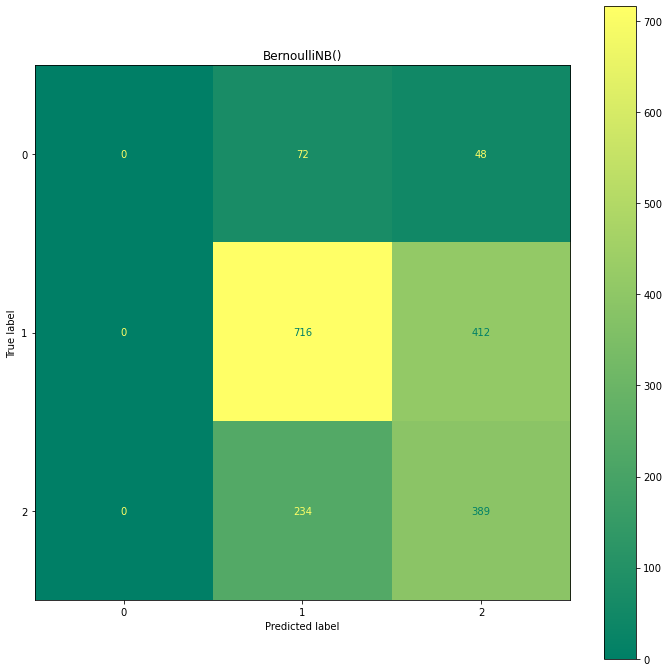

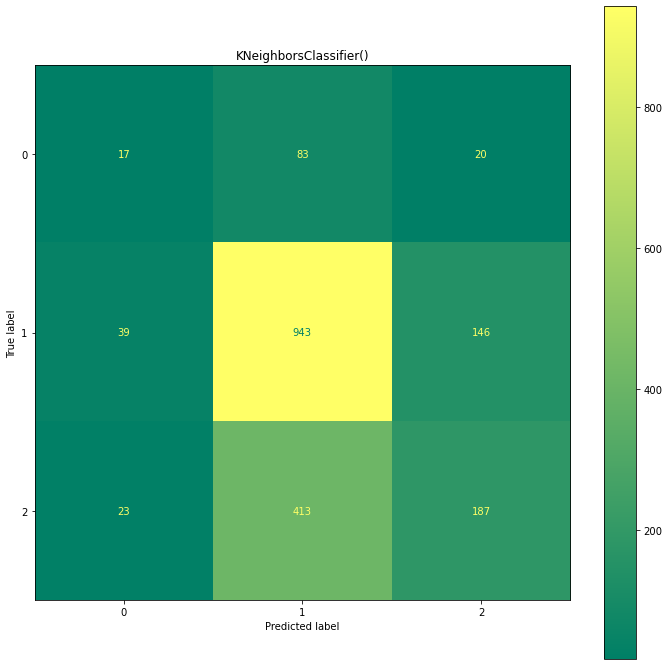

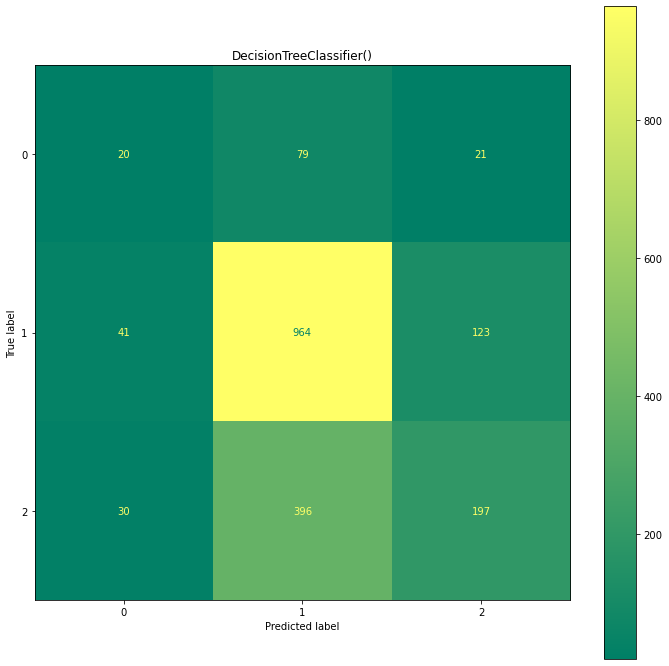

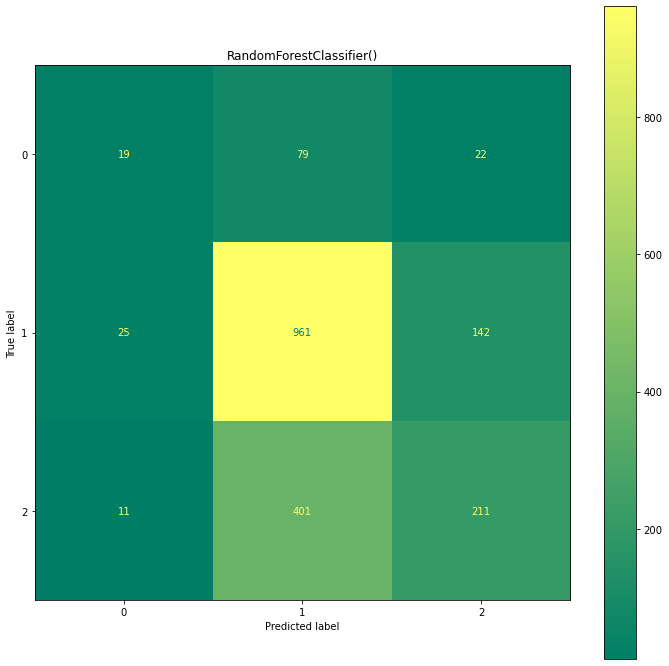

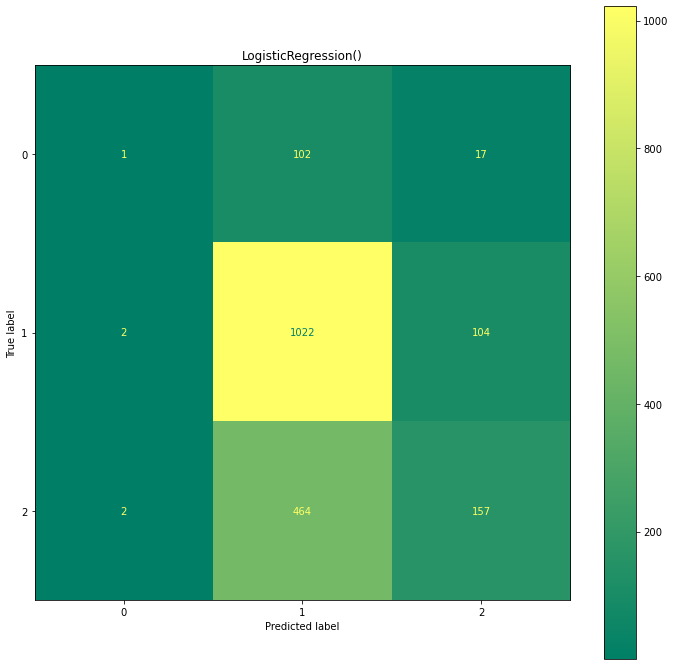

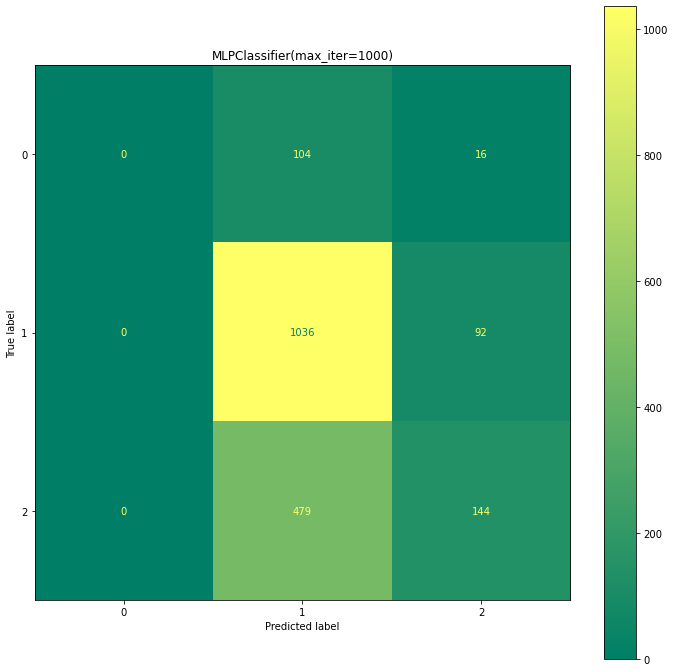

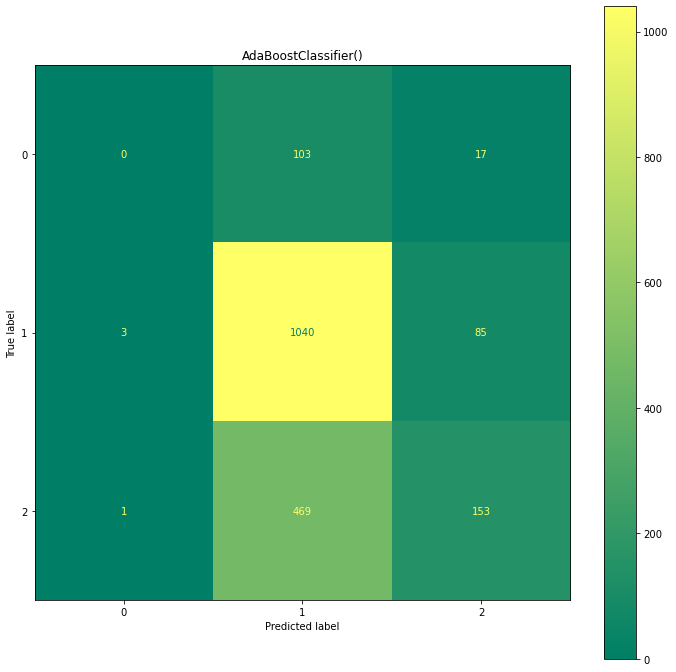

In [98]:
for name, sklearn_classifier in classifiers.items():
     classifier = sklearn_classifier
     classifier.fit(X_train_sia, y_train)
     accuracy = classifier.score(X_train_sia, y_train)
     print(F"Train score: {accuracy:.2%} - {name}")
     
     fig, ax = plt.subplots(figsize =(12,12))
     plot_confusion_matrix(classifier, X_test_sia, y_test, ax=ax, cmap='summer')
     ax.set_title(classifier); 
    
     accuracy = classifier.score(X_test_sia, y_test)
     print(F"Test score: {accuracy:.2%} - {name}")

Train score: 60.79% - BernoulliNB
Test score: 63.28% - BernoulliNB
Train score: 72.06% - KNeighborsClassifier
Test score: 66.82% - KNeighborsClassifier
Train score: 78.52% - DecisionTreeClassifier
Test score: 67.50% - DecisionTreeClassifier
Train score: 78.52% - RandomForestClassifier
Test score: 66.88% - RandomForestClassifier
Train score: 66.31% - LogisticRegression
Test score: 66.53% - LogisticRegression
Train score: 66.32% - MLPClassifier
Test score: 66.36% - MLPClassifier
Train score: 67.88% - AdaBoostClassifier
Test score: 66.99% - AdaBoostClassifier


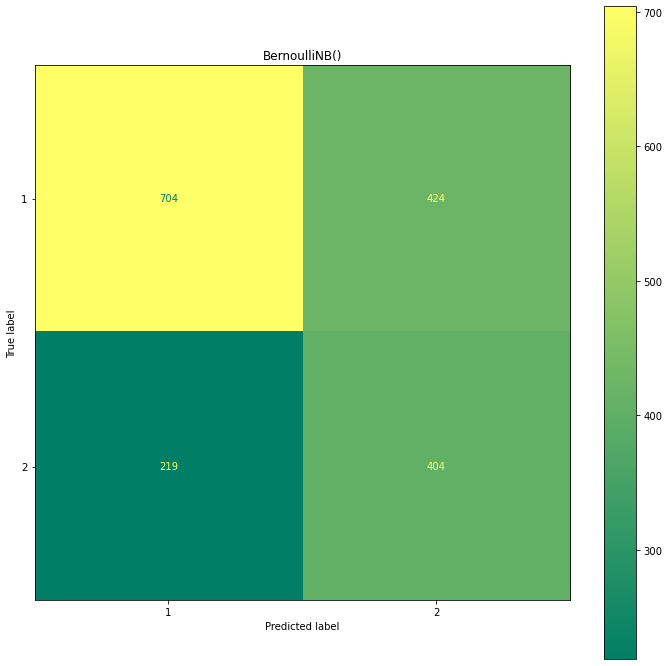

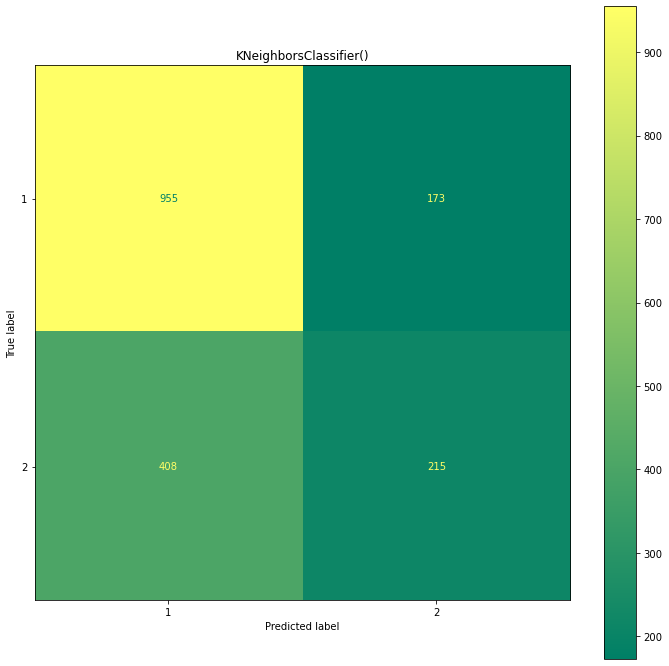

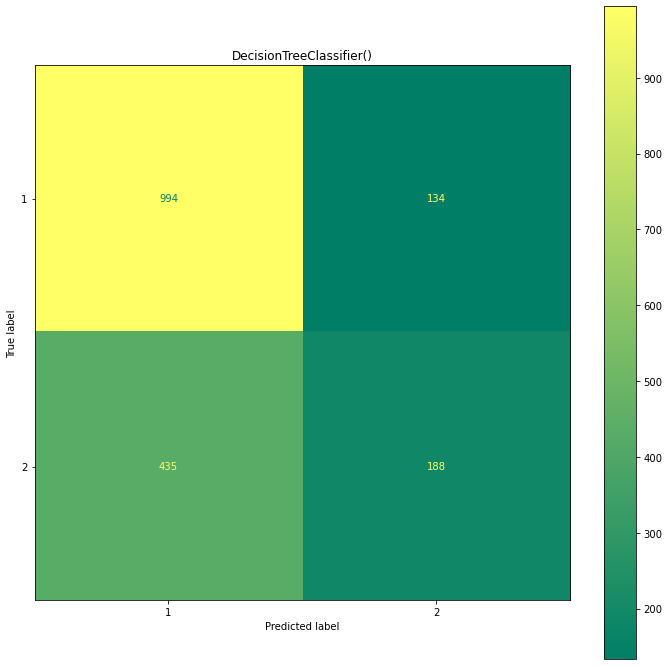

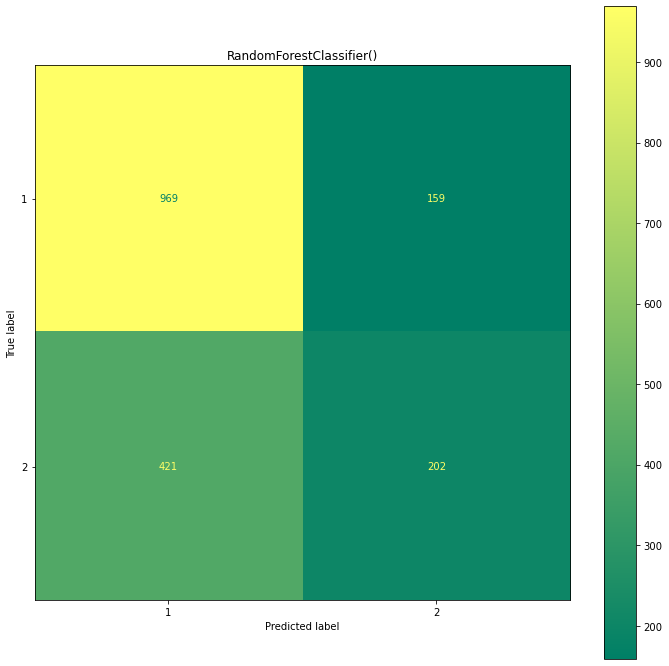

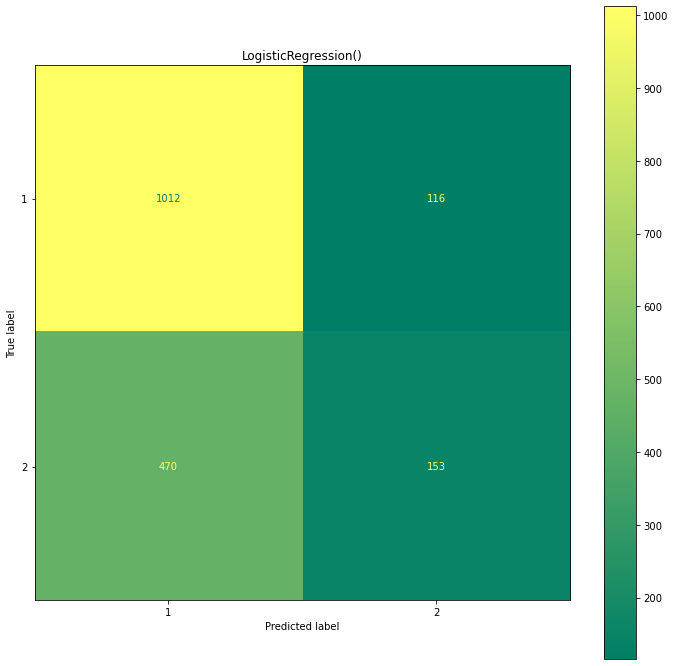

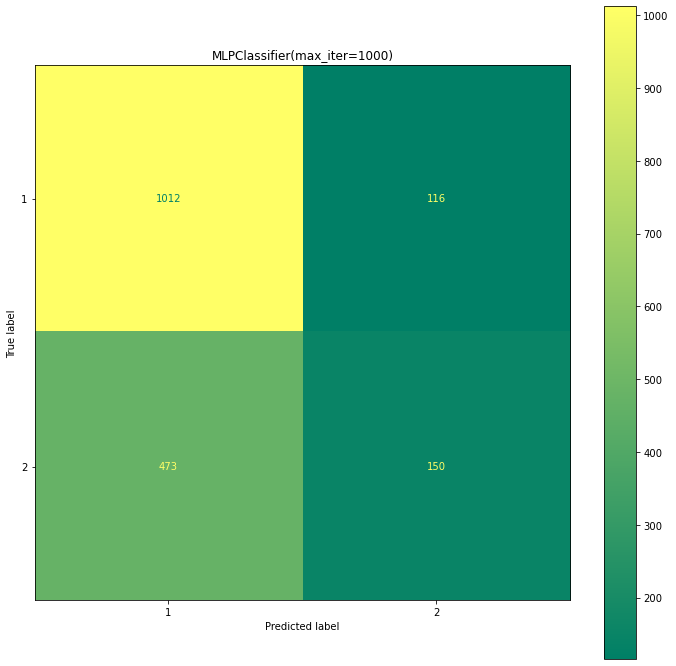

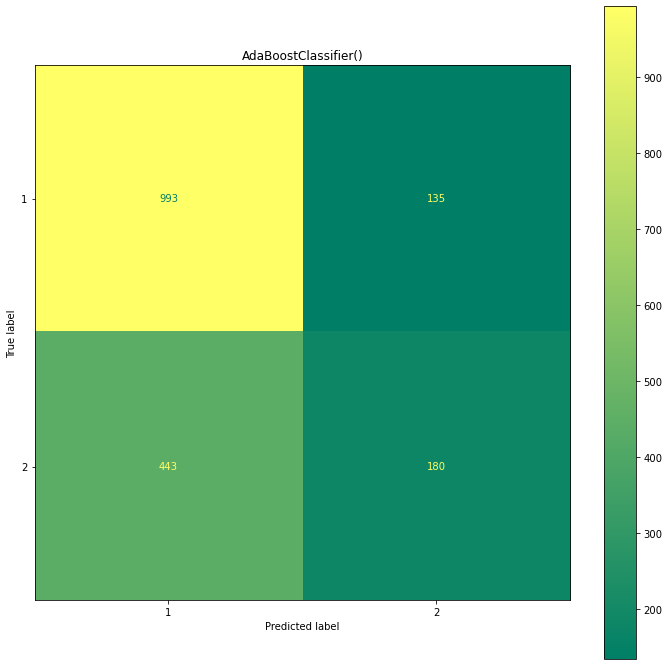

In [103]:
for name, sklearn_classifier in classifiers.items():
     classifier = sklearn_classifier
     classifier.fit(X_train2_sia, y_train2)
     accuracy = classifier.score(X_train2_sia, y_train2)
     print(F"Train score: {accuracy:.2%} - {name}")
     
     fig, ax = plt.subplots(figsize =(12,12))
     plot_confusion_matrix(classifier, X_test2_sia, y_test2, ax=ax, cmap='summer')
     ax.set_title(classifier); 
    
     accuracy = classifier.score(X_test2_sia, y_test2)
     print(F"Test score: {accuracy:.2%} - {name}")